<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Regressao_linear/blob/main/Aprova%C3%A7%C3%A3o_Alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_excel('/content/drive/MyDrive/aprovacao_alunos (1).xlsx')

In [47]:
df

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76
5,Amapa,76,75
6,Tocantins,81,82
7,Maranhao,81,81
8,Piaui,80,81
9,Ceara,86,85


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


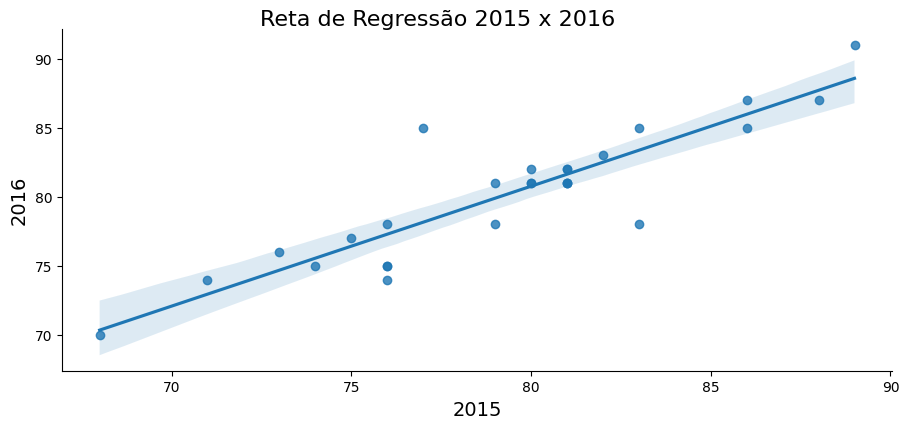

In [49]:
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=df)
ax.fig.set_size_inches(10, 4)
ax.fig.suptitle('Reta de Regressão 2015 x 2016', fontsize=16, y=1.02)
ax.set_xlabels("2015", fontsize=14)
ax.set_ylabels("2016", fontsize=14)
ax;

In [50]:
df = df.select_dtypes(include=['number'])
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [51]:
import statsmodels.api as sm

In [52]:
Y = df.ano_2016
X = sm.add_constant(df.ano_2016)

In [53]:
resultado_regressao = sm.OLS(Y, X).fit()

In [54]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.693e+28
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:03:38   Log-Likelihood:                 774.20
No. Observations:                  27   AIC:                            -1544.
Df Residuals:                      25   BIC:                            -1542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.066e-13    2.9e-13      0.368      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1580: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1776: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic 

In [55]:
df['Y_previsto'] = resultado_regressao.predict()
df.head()

,ano_2015,ano_2016,Y_previsto
0,77,85,85.0
1,79,81,81.0
2,83,85,85.0
3,81,82,82.0
4,73,76,76.0


In [56]:
df['residuo'] = df['Y_previsto'] - df['ano_2016']
df.head()

,ano_2015,ano_2016,Y_previsto,residuo
0,77,85,85.0,8.526513e-14
1,79,81,81.0,8.526513e-14
2,83,85,85.0,8.526513e-14
3,81,82,82.0,8.526513e-14
4,73,76,76.0,8.526513e-14
